In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'shopping_trends_updated.csv'
data = pd.read_csv(file_path)

In [3]:

bins = [10, 25, 40, 55, float('inf')]
labels = ['10-25', '26-40', '41-55', '55+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [4]:

age_group_category = data.groupby(['Age Group', 'Category']).size().unstack().idxmax(axis=1)

Text(0, 0.5, 'Count of Products Sold')

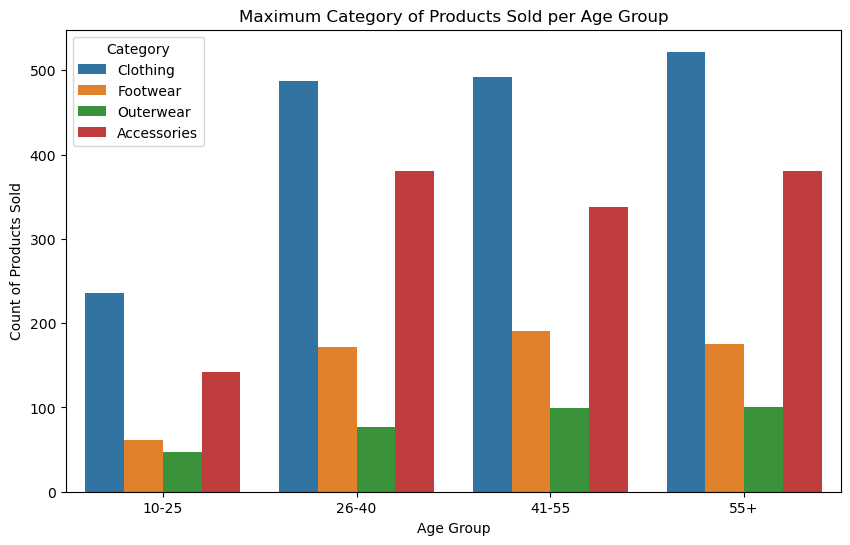

In [5]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Category', data=data, ax=ax, order=labels)
ax.set_title('Maximum Category of Products Sold per Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Products Sold')

In [6]:
top_20_locations = data['Location'].value_counts().head(20).index


In [7]:

top_locations_data = data[data['Location'].isin(top_20_locations)]

In [8]:

location_category = top_locations_data.groupby(['Location', 'Category']).size().unstack().idxmax(axis=1)


Text(0, 0.5, 'Location')

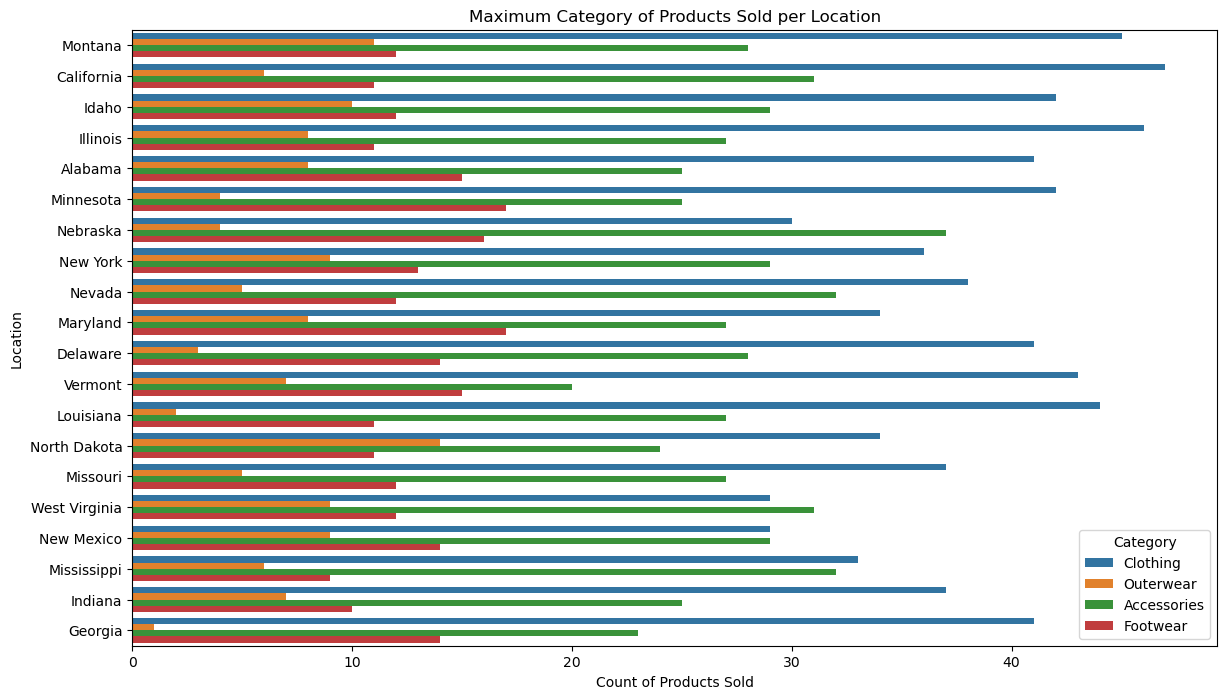

In [9]:

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(y='Location', hue='Category', data=top_locations_data, order=top_20_locations, ax=ax)
ax.set_title('Maximum Category of Products Sold per Location')
ax.set_xlabel('Count of Products Sold')
ax.set_ylabel('Location')

Enter a category: Clothing
Suitable locations for sales of Clothing are:
Alabama
California
Delaware
Georgia
Idaho
Illinois
Indiana
Louisiana
Maryland
Minnesota
Mississippi
Missouri
Montana
Nevada
New York
North Dakota
Vermont
ANALYSIS CHART:


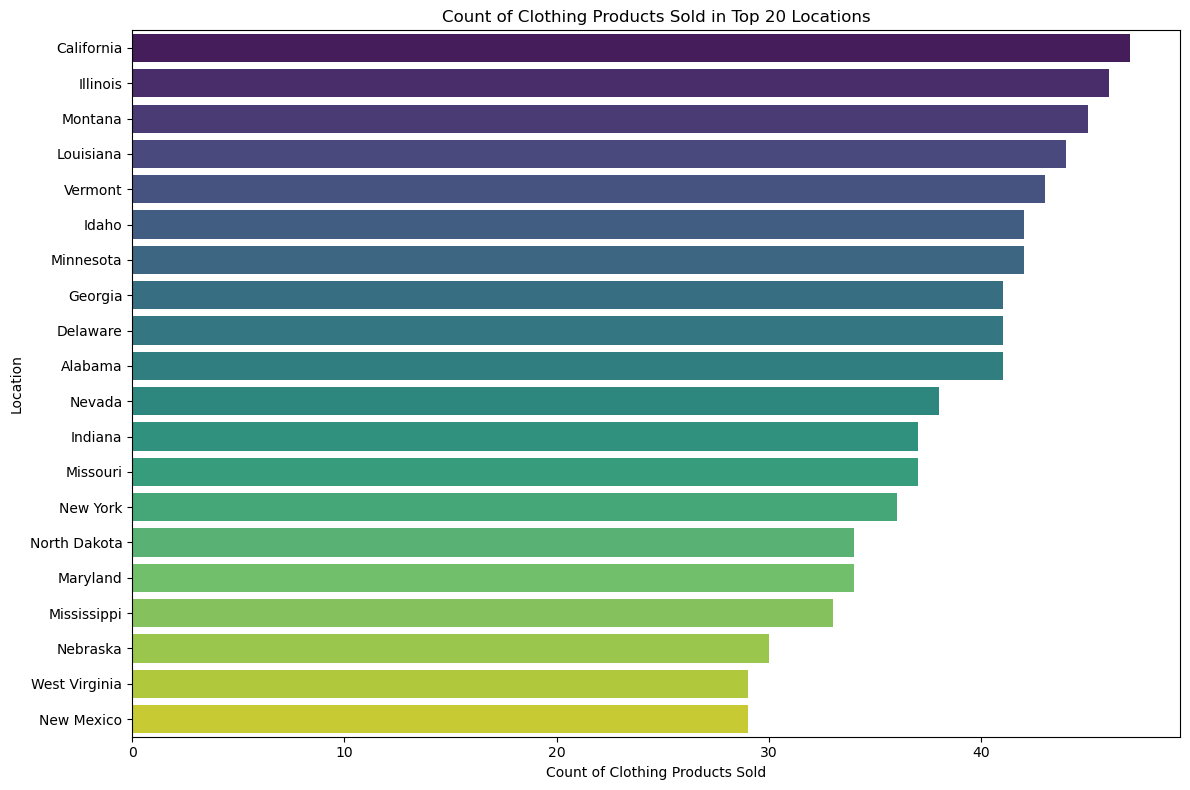

In [10]:
location_category = {
    'Alabama': 'Clothing',
    'California': 'Clothing',
    'Delaware': 'Clothing',
    'Georgia': 'Clothing',
    'Idaho': 'Clothing',
    'Illinois': 'Clothing',
    'Indiana': 'Clothing',
    'Louisiana': 'Clothing',
    'Maryland': 'Clothing',
    'Minnesota': 'Clothing',
    'Mississippi': 'Clothing',
    'Missouri': 'Clothing',
    'Montana': 'Clothing',
    'Nebraska': 'Accessories',
    'Nevada': 'Clothing',
    'New Mexico': 'Accessories',
    'New York': 'Clothing',
    'North Dakota': 'Clothing',
    'Vermont': 'Clothing',
    'West Virginia': 'Accessories'
}


def find_locations_with_max_count(input_category):
    
    category_counts_per_location = {}

  
    for location, category in location_category.items():
        if category not in category_counts_per_location:
            category_counts_per_location[category] = {}
        
        if location not in category_counts_per_location[category]:
            category_counts_per_location[category][location] = 0
        
        category_counts_per_location[category][location] += 1

    
    max_count = -1
    max_locations = []

    if input_category in category_counts_per_location:
        max_count = max(category_counts_per_location[input_category].values())
        max_locations = [location for location, count in category_counts_per_location[input_category].items() if count == max_count]

    return max_locations, max_count


input_category = input("Enter a category: ")
locations, max_count = find_locations_with_max_count(input_category)

if locations:
    
    print(f"Suitable locations for sales of {input_category} are:")
    for location in locations:
        print(location)
else:
    print(f"No locations found with category '{input_category}'.")

    
    
print("ANALYSIS CHART:")

clothing_data = data[data['Category'] == input_category]


clothing_counts_per_location = clothing_data['Location'].value_counts().reset_index()
clothing_counts_per_location.columns = ['Location', 'Count']


top_20_locations = data['Location'].value_counts().head(20).index




clothing_data_top_20 = clothing_data[clothing_data['Location'].isin(top_20_locations)]



clothing_counts_top_20 = clothing_data_top_20['Location'].value_counts().reset_index()
clothing_counts_top_20.columns = ['Location', 'Count']


plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Location', data=clothing_counts_top_20, palette='viridis')
plt.title('Count of Clothing Products Sold in Top 20 Locations')
plt.xlabel('Count of Clothing Products Sold')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


enter a location: California


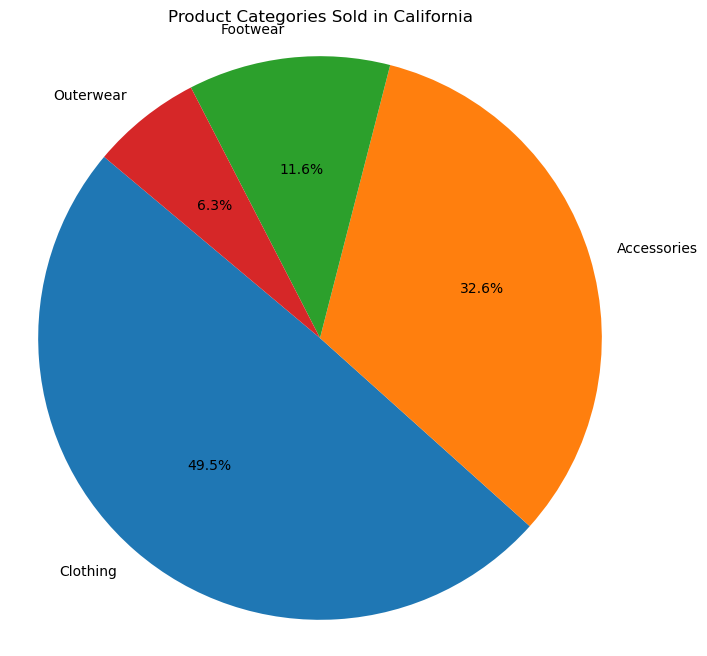

In [11]:
location=input("enter a location: ")
def generate_pie_chart(location):
    
    location_data = data[data['Location'] == location]
    
    
    category_counts = location_data['Category'].value_counts()
    
    
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Product Categories Sold in {location}')
    plt.axis('equal')  
    plt.show()
generate_pie_chart(location)